<a href="https://colab.research.google.com/github/saikruthikreddy/loan-prediction-system-for-banks/blob/main/ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np # linear algebra
from scipy.sparse import csr_matrix
import os #path to file

In [ ]:
#ploting data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# matrix

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sns.set(style='darkgrid', font='sans-serif', font_scale=1)

In [ ]:
#Handling warnings
warnings.filterwarnings("ignore")

In [ ]:
#select the training and test paths.

train_path = "/content/train_u6lujuX_CVtuZ9i.csv"
test_path = "/content/test_Y3wMUE5_7gLdaTN.csv"

In [ ]:
# Read Train File
train_df = pd.read_csv(train_path)

In [ ]:
#Explore first 5 rows
train_df.head()
#Read test file
test_df = pd.read_csv(test_path)

In [ ]:
#Explore first 5 rows
test_df.head()# Basic info about dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Stats summary
train_df.describe()
# Since we don't need ID column, so we drop it in both the datasets.
train_df.drop(labels='Loan_ID', axis=1, inplace=True)
test_df.drop(labels="Loan_ID", axis=1, inplace=True)

In [ ]:
# Explore random 10 rows
train_df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
325,Male,Yes,1,Graduate,Yes,8666,4983.0,376.0,360.0,0.0,Rural,N
176,Male,Yes,2,Graduate,No,2045,1619.0,101.0,360.0,1.0,Rural,Y
438,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban,N
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
38,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
60,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y


In [ ]:
##Count Missing Value
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Checking unique variables and dtypes in Credit_History
print(f"Unique vaiables: {train_df['Credit_History'].unique()} \n\ndtype of Credit_History: {train_df['Credit_History'].dtype}")

Unique vaiables: [ 1.  0. nan] 

dtype of Credit_History: float64


In [ ]:
# Convert the Credit_History column to the object datatype
train_df['Credit_History'] = train_df['Credit_History'].astype('object')
train_df['Credit_History'].dtype

dtype('O')

In [ ]:
# List of columns with missing values
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

In [ ]:
# Imputation loop
for col in null_cols:
    if train_df[col].dtype == 'object':
        # Impute categorical variables with mode
        mode_value = train_df[col].mode()[0]
        train_df[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Impute numerical variables with mean for non-binary, and mode for binary
        mean_value = train_df[col].mean()
        train_df[col].fillna(mean_value, inplace=True)
        print(f"Imputed {col} with mean: {mean_value}")

Imputed Credit_History with mode: 1.0
Imputed Self_Employed with mode: No
Imputed LoanAmount with mean: 146.41216216216216
Imputed Dependents with mode: 0
Imputed Loan_Amount_Term with mean: 342.0
Imputed Gender with mode: Male
Imputed Married with mode: Yes


In [ ]:
# Count Null v
train_df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

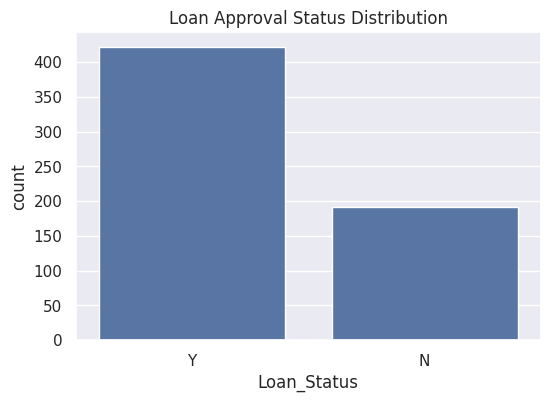

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Approval Status Distribution')
plt.show()

In [ ]:
# Lets distribute our datatype into numerical and categorical datatype

numerical = train_df.select_dtypes('number').columns.to_list()
categorical = train_df.select_dtypes('object').columns.to_list()
loan_num = train_df[numerical]
loan_cat = train_df[categorical]

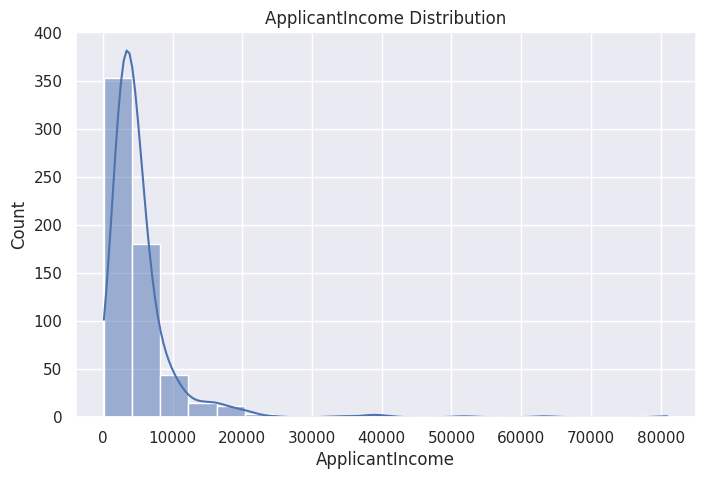

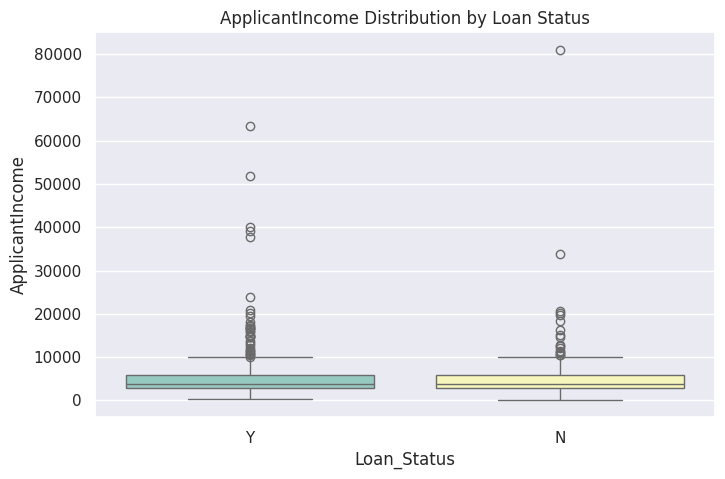

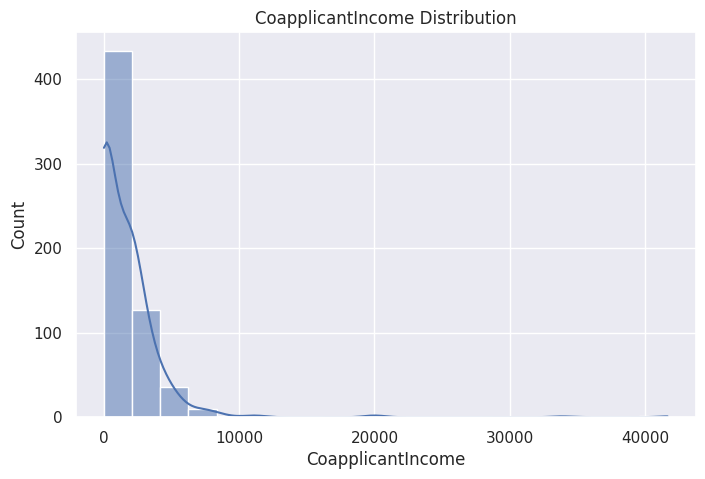

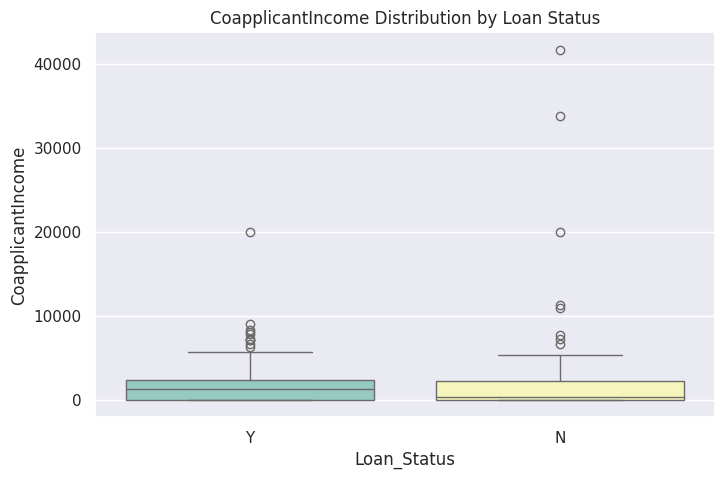

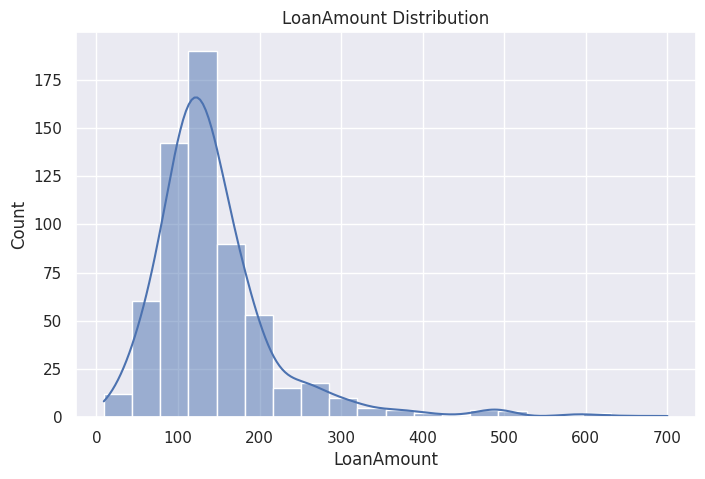

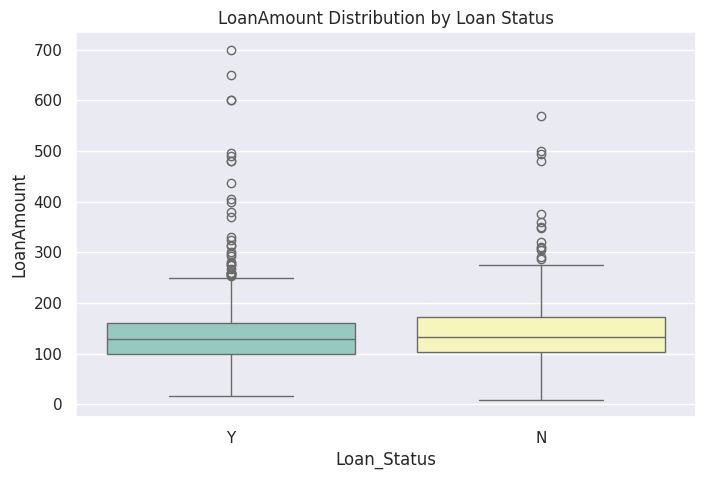

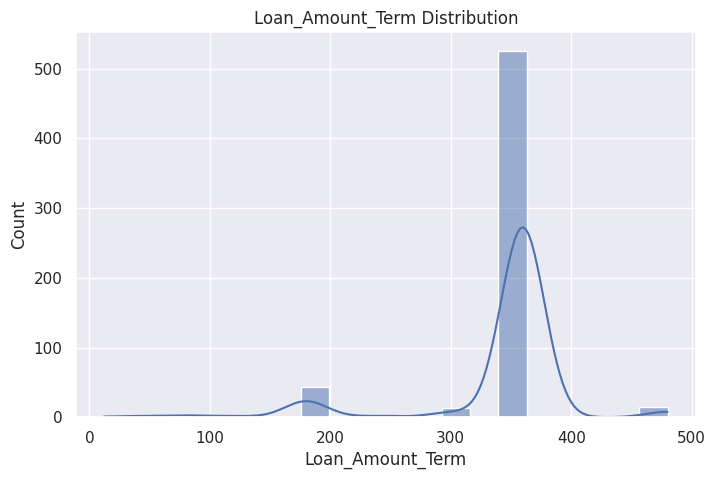

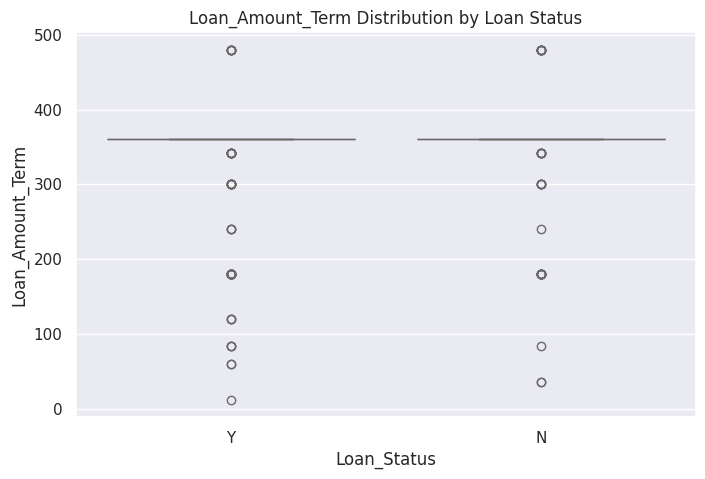

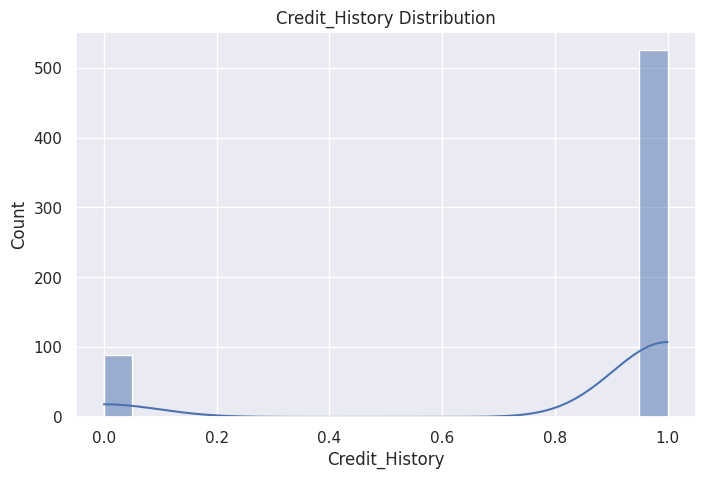

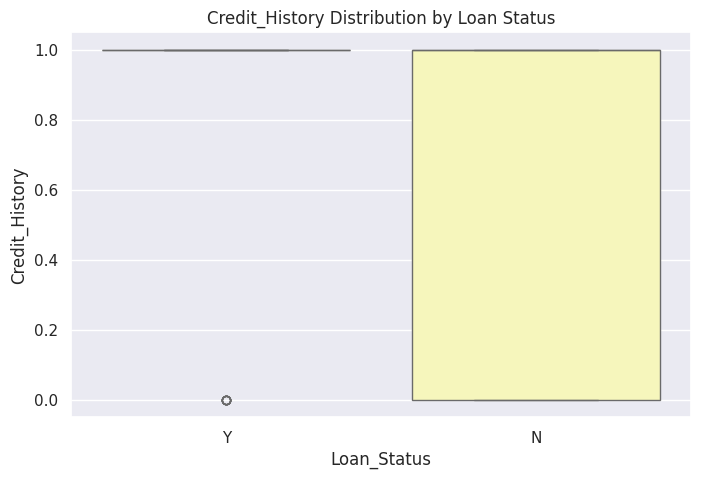

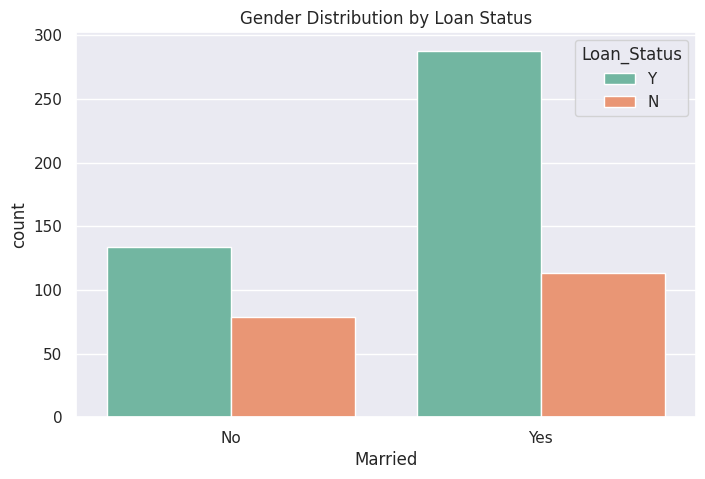

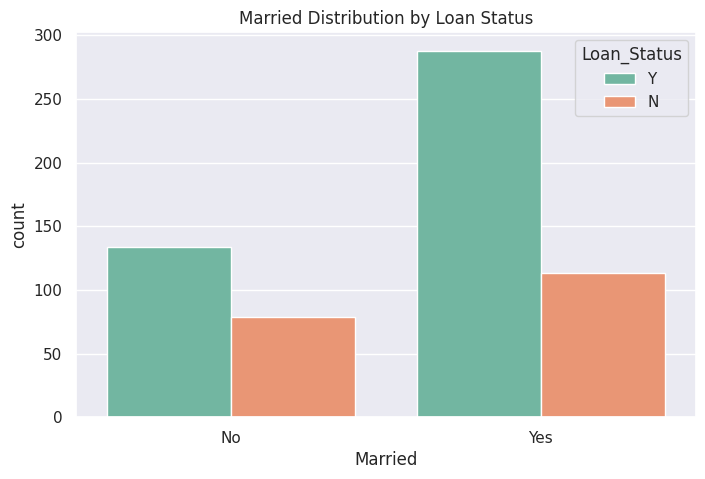

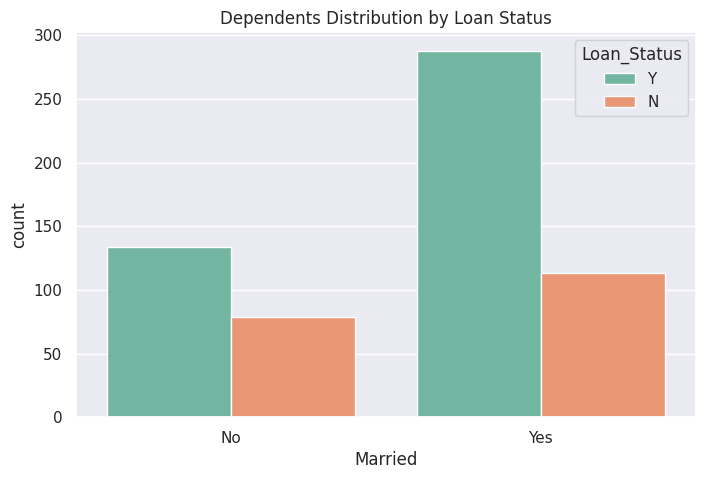

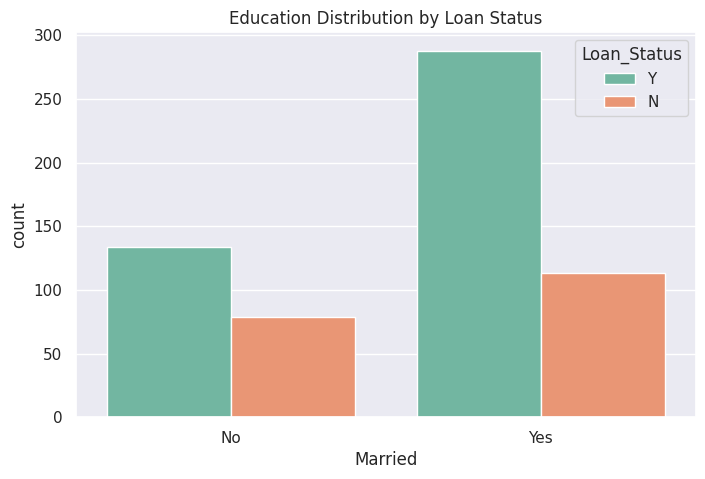

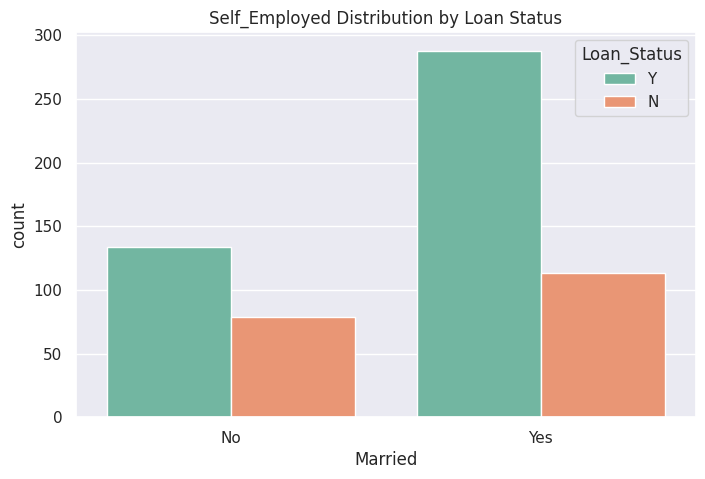

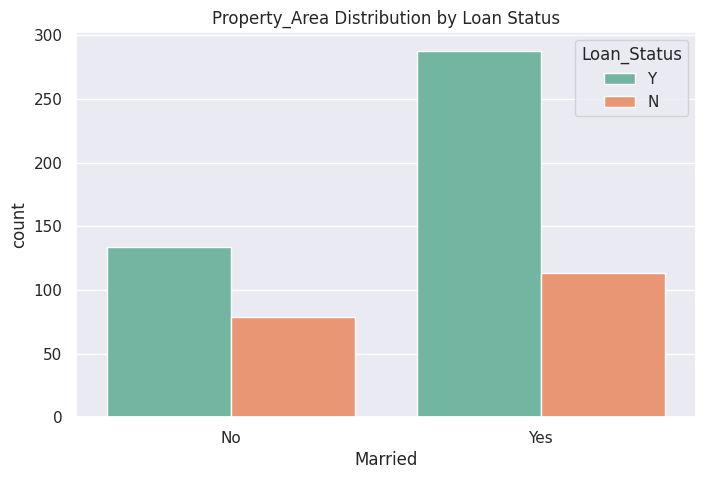

In [ ]:
# Visualizing Distplot on numerical columns
for i in loan_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[i], bins=20, kde=True)
    plt.title(f'{i} Distribution')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Loan_Status', y=i, data=train_df, palette='Set3')
    plt.title(f'{i} Distribution by Loan Status')
    plt.show()
for i in categorical[:-1]: #excluding the last element since it is Loan_Status itself
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Loan_Status', data=train_df, palette='Set2')
    plt.title(f'{i} Distribution by Loan Status')
    plt.show()

In [ ]:
#Mapping Categorical values

label_mapping = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'0': 0, '1': 1, '2': 2, '3+': 3 ,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 1, 'Semiurban': 2,'Rural': 3,
'Y': 1, 'N': 0}


In [ ]:
# Apply label encoding to categorical columns
train_df.replace(label_mapping, inplace=True)
test_df.replace(label_mapping, inplace=True)

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------        

In [ ]:
# Creating a correlation between the training dataset
corr_matrix = train_df.corr()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,-0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,-0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.001963,0.540556


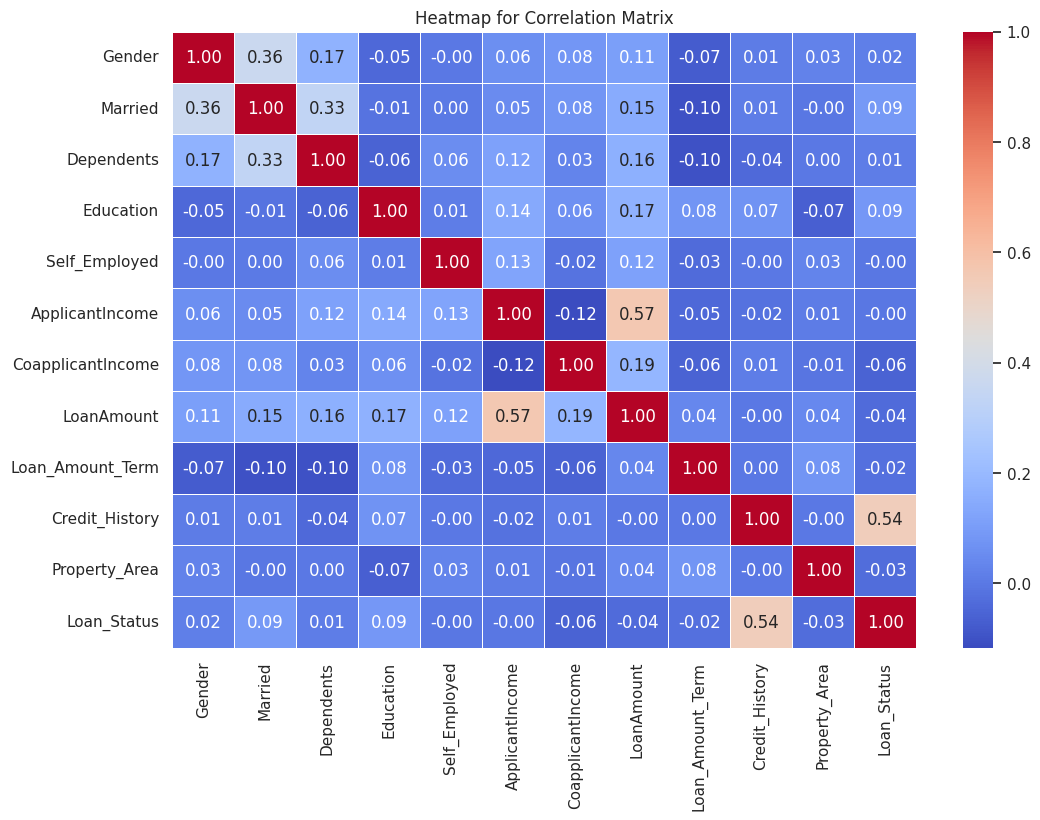

In [ ]:
# Plotting Heatmap for better visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap for Correlation Matrix")
plt.show()

In [ ]:
# Split training data
y = train_df['Loan_Status']
x = train_df.drop('Loan_Status', axis=1)

In [ ]:
# Convert DataFrame to sparse matrix
x_sparse = csr_matrix(x.values)

x_train, x_test, y_train, y_test = train_test_split(x_sparse, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler(with_mean=False)

In [ ]:
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_dense)
x_test_scaled = scaler.transform(x_test_dense)

In [ ]:
# Data Scaling
scaler = StandardScaler(with_mean=False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

<429x11 sparse matrix of type '<class 'numpy.float64'>'
	with 3559 stored elements in Compressed Sparse Row format>

In [ ]:
# Model Training with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
LR = LogisticRegression(random_state=42)
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# Model Prediction
y_pred = grid_search.predict(x_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.827027027027027

Confusion Matrix:
[[ 21  30]
 [  2 132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

